In [13]:
# tools
import pandas as pd
import numpy as np

# graph
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

# framework
import h2o
from h2o.automl import H2OAutoML

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [14]:
# Start the H2O cluster (locally)
h2o.init(
    nthreads=-1,
    max_mem_size_GB = 4
)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,15 mins 25 secs
H2O_cluster_timezone:,Asia/Ho_Chi_Minh
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,24 days
H2O_cluster_name:,H2O_from_python_PV_tilgtx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.939 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [15]:
#initial information
path = "C:\\Users\\PV\\OneDrive\\Documents\\ehhhh\\Machine Learning\\data_poll\\"

rd_seed = 173808

In [16]:
df = h2o.import_file(path=path + 'copy_of_ys1a_with_phase.csv')

# df['phase'] = df['phase'].asnumeric()

X_train, X_test, valid = df.split_frame(ratios=[.6, .2], seed=rd_seed)

X_train

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


vec,deltachi,delta,deltahmix,deltasmix,phase,ys
9,0.0329983,0.327647,-1.33333,9.13437,FCC,204
8.61538,0.0324903,2.02528,-11.8343,10.6865,FCC,196
8.28571,0.0319438,2.65771,-19.4286,11.2394,FCC+Im,476
8.53846,0.077,3.94493,-6.05917,10.6865,FCC,158
8.14286,0.0970798,5.12318,-9.46939,11.2394,FCC+BCC,346
8.25,0.0966954,0.302116,-3.75,11.5263,FCC,148
8.16841,0.101488,2.29778,-5.47301,12.2121,FCC+Im,318
8.09082,0.105577,3.14608,-7.02481,12.5872,FCC+Im,403
7.2,0.120565,5.77789,-12.32,13.3816,BCC,1051
7.2,0.120565,5.77789,-12.32,13.3816,BCC,1138


In [17]:
X_test

vec,deltachi,delta,deltahmix,deltasmix,phase,ys
9,0.0329983,0.327647,-1.33333,9.13437,FCC,209
9,0.0329983,0.327647,-1.33333,9.13437,FCC,211
7.8,0.10939,5.80498,-11.9467,11.4681,FCC+BCC,794
8.12876,0.103631,2.77092,-6.27664,12.4206,FCC+Im,322
8.01694,0.109094,3.74353,-8.42376,12.8452,FCC+Im,479
7.94651,0.112136,4.20566,-9.68594,13.0299,FCC+Im,638
7.2,0.119184,5.53843,-11.3975,12.796,FCC+BCC+B2,2033
7.2,0.120565,5.77789,-12.32,13.3816,BCC,1251
7.13725,0.160337,8.00993,-15.3479,13.9216,BCC+Im,957
6.90909,0.249939,13.1723,-25.2562,14.698,BCC+Im,1060


In [18]:
x_label = X_train.columns
y_label = "ys"
x_label.remove(y_label)

In [19]:
aml = H2OAutoML(
    nfolds = 10, 
    max_models=30, 
    sort_metric='RMSE',
    exclude_algos = ["DeepLearning"],
    seed=rd_seed,
    keep_cross_validation_predictions= True,
    keep_cross_validation_fold_assignment=True
)

aml.train(x=x_label, y=y_label, training_frame=X_train)

AutoML progress: |█
22:46:23.342: AutoML: XGBoost is not available; skipping it.
22:46:23.488: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 121.0.

██████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_2_20221217_224623_model_6


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    64                 64                          14881                  4            8            6.78125       6             19            13.8906

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 9674.033428685123
RMSE: 98.3566643836864
MAE: 74.47946545309271
RMSLE: 0.11412097751205094
Mean Residual Deviance: 9674.033428685123

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 79063.25522270262
RMSE: 281.18188992661425
MAE: 216.5374339509563
RMSLE: 0.3225174629619524
Mean Residual Deviance: 79063.25522270262

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     216.18    48.0938    252.154       256.752       208.505       174.617       218.24        159.083       308.907       227.842       201.868       153.834
mean_residual_deviance  80804.8   42010.3    108867        96030.2       71250.2       54364.5       89481.4       50744.6       182337        62842         51072.4       41058.8
mse                     80804.8   42010.3    108867        96030.2       71250.2       54364.5       89481.4       50744.6       182337        62842         51072.4       41058.8
r2                      0.755439  0.132286   0.480836      0.747852      0.805417      0.776038      0.649025      0.873152      0.62644       0.839333      0.869937      0.886357
residual_deviance       80804.8   42010.3    108867        96030.2       71250.2       54364.5       89481.4       50744.6       182337        62842         51072.4       41058.8
rmse                    277.064   67.0017    329.95        309.887       266.927       233.162       299.134       225.266       427.01        250.683       225.992       202.63
rmsle                   0.302891  0.0984797  0.250149      0.43917       0.302923      0.278897      0.454138      0.242373      0.378133      0.323234      0.215382      0.144512

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2022-12-17 22:46:33  2.343 sec   0                  612.967          478.483         375728
    2022-12-17 22:46:33  2.347 sec   5                  446.611          348.346         199461
    2022-12-17 22:46:33  2.351 sec   10                 348.487          270.153         121443
    2022-12-17 22:46:33  2.355 sec   15                 276.419          215.316         76407.2
    2022-12-17 22:46:33  2.359 sec   20                 233.021          180.624         54298.9
    2022-12-17 22:46:33  2.363 sec   25                 193.935          151.539         37610.6
    2022-12-17 22:46:33  2.368 sec   30                 172.551          134.667         29773.8
    2022-12-17 22:46:33  2.371 sec   35                 156.54           122.826         24504.9
    2022-12-17 22:46:33  2.376 sec   40                 139.11           108.33          19351.7
    2022-12-17 22:46:33  2.380 sec   45                 129.043          100.199         16652
    2022-12-17 22:46:33  2.384 sec   50                 117.582          90.1988         13825.5
    2022-12-17 22:4

In [20]:
# Get leaderboard with all possible columns
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb.head(rows= lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_2_20221217_224623_model_6,281.182,79063.3,216.537,0.322517,79063.3,54,0.011843,GBM
GBM_grid_1_AutoML_2_20221217_224623_model_18,284.253,80800,215.277,0.291243,80800,84,0.013461,GBM
GBM_grid_1_AutoML_2_20221217_224623_model_12,285.196,81336.9,209.794,0.327908,81336.9,48,0.010838,GBM
StackedEnsemble_AllModels_1_AutoML_2_20221217_224623,287.749,82799.7,213.417,0.306341,82799.7,691,0.121527,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_2_20221217_224623,289.163,83615.3,212.77,0.307087,83615.3,322,0.030235,StackedEnsemble
DRF_1_AutoML_2_20221217_224623,294.385,86662.7,213.965,0.314857,86662.7,1166,0.009419,DRF
GBM_grid_1_AutoML_2_20221217_224623_model_17,295.873,87540.6,218.141,0.33169,87540.6,61,0.014305,GBM
XRT_1_AutoML_2_20221217_224623,298.23,88941.1,215.821,0.311662,88941.1,215,0.025901,DRF
GBM_grid_1_AutoML_2_20221217_224623_model_8,298.345,89009.5,216.537,0.317718,89009.5,109,0.026561,GBM
GBM_grid_1_AutoML_2_20221217_224623_model_11,299.552,89731.1,225.603,0.317267,89731.1,75,0.014169,GBM


In [21]:
y_pred = aml.predict(X_test)

# best model perdiction
y_pred_list = h2o.as_list(y_pred, use_pandas=False)
y_pred_df = h2o.as_list(y_pred)

y_true_list = h2o.as_list(X_test['ys'], use_pandas=False)
y_true_df = h2o.as_list(X_test['ys'])

print(type(y_true_df))
print(type(y_pred_df))
data_as_df = pd.concat([y_true_df, y_pred_df], axis=1)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [24]:
y_pred

predict
193.943
193.943
847.187
502.533
472.98
463.464
1557.02
1156.31
1847.15
1648.91


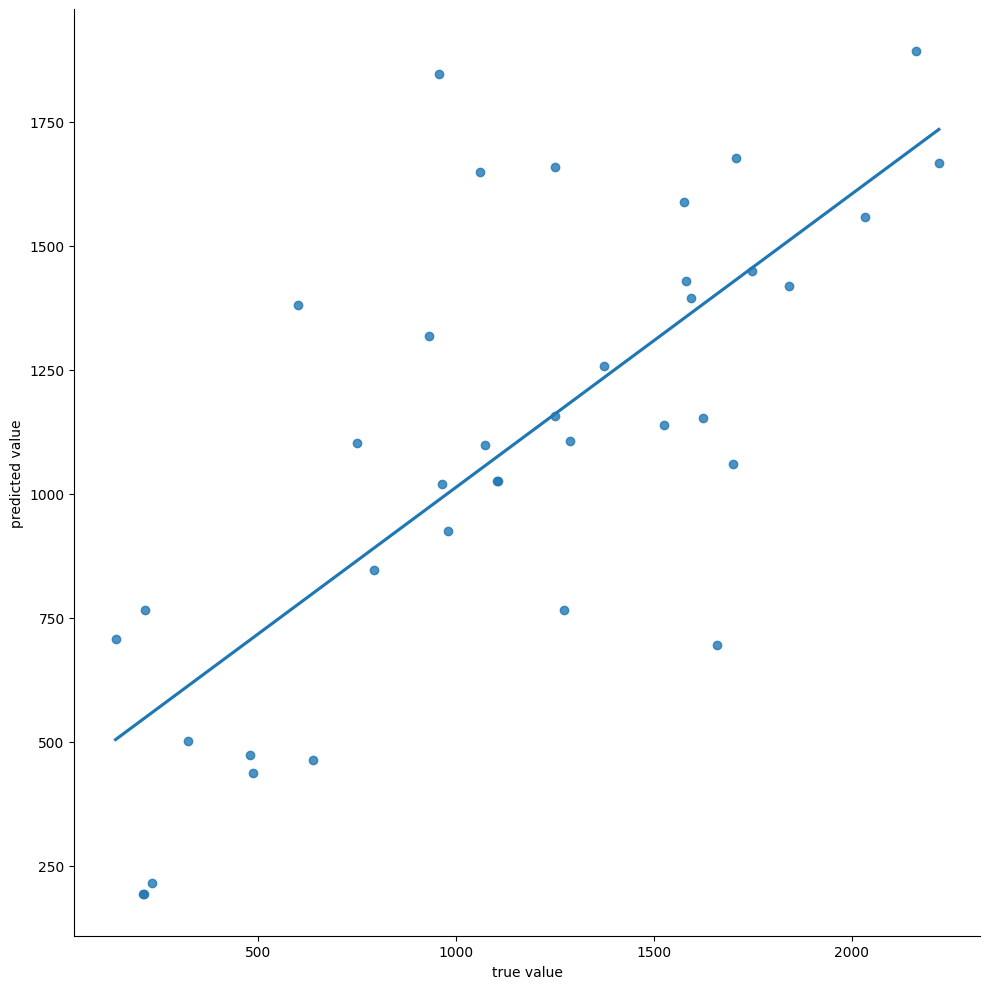

In [22]:
ax = sns.lmplot(x='ys', y='predict', data=data_as_df, height=10, ci=None)
ax.set(xlabel='true value', ylabel='predicted value')

ax

In [23]:
best_model = aml.get_best_model()
best_model

h2o.save_model(best_model, path='C:\\Users\\PV\\OneDrive\\Documents\\ehhhh\\Machine Learning\\h2o')

'C:\\Users\\PV\\OneDrive\\Documents\\ehhhh\\Machine Learning\\h2o\\GBM_grid_1_AutoML_2_20221217_224623_model_6'